In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras 

H:\install anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


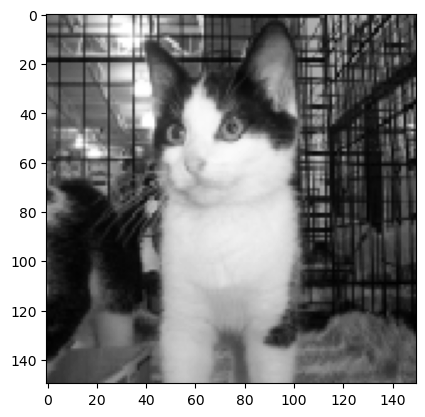

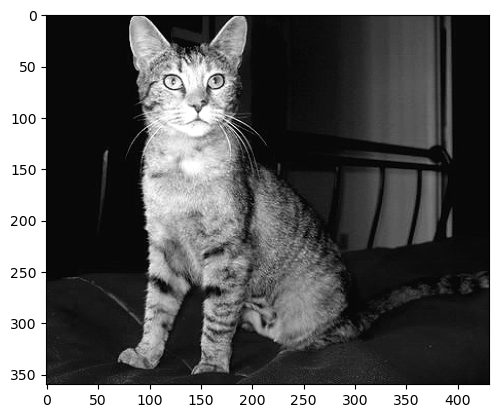

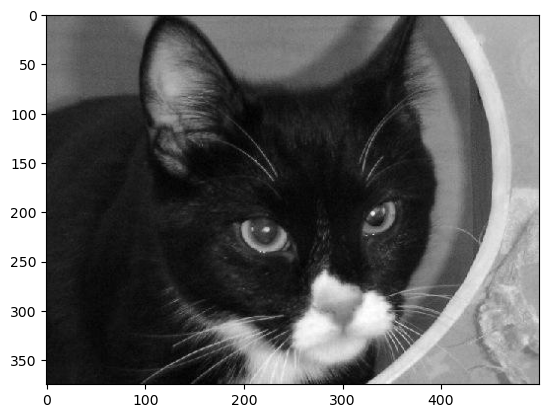

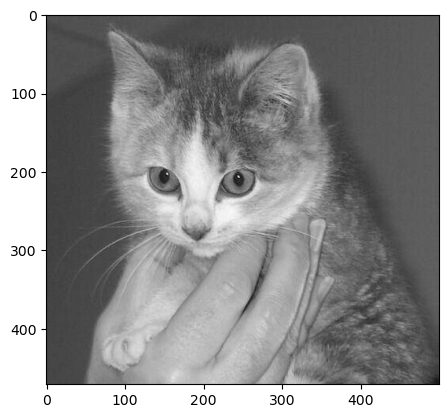

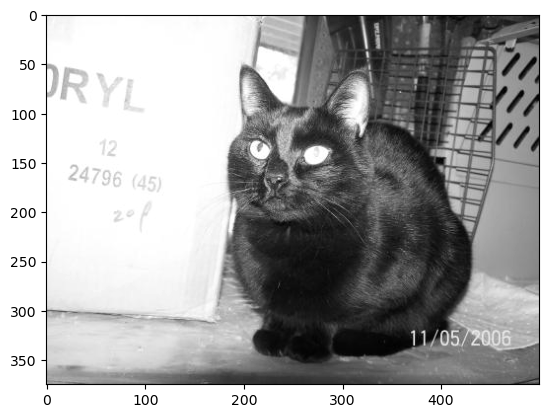

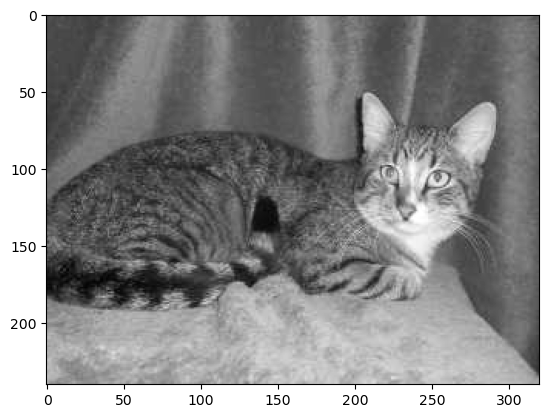

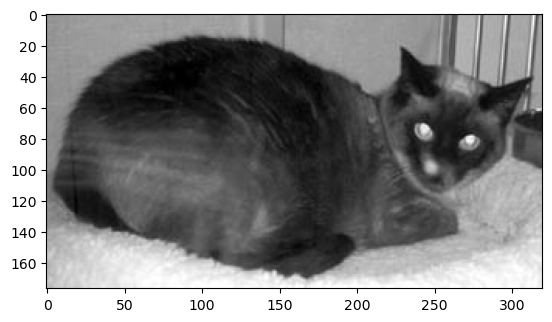

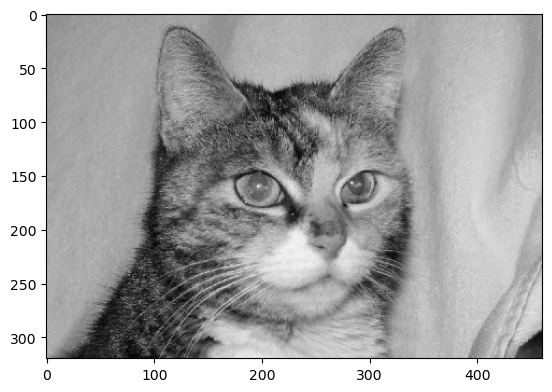

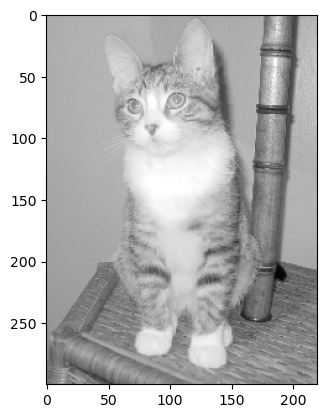

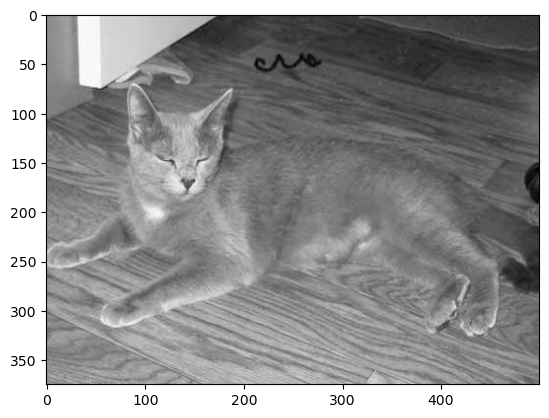

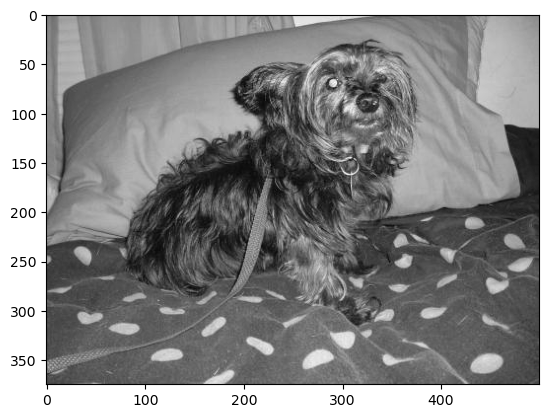

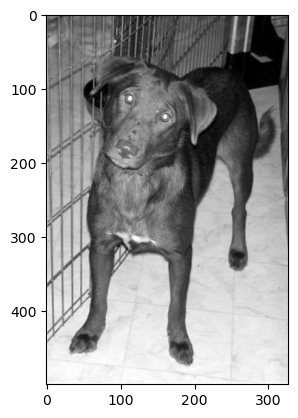

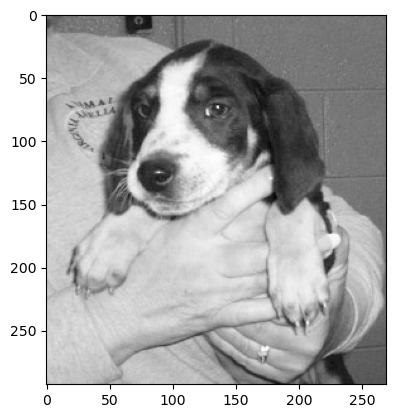

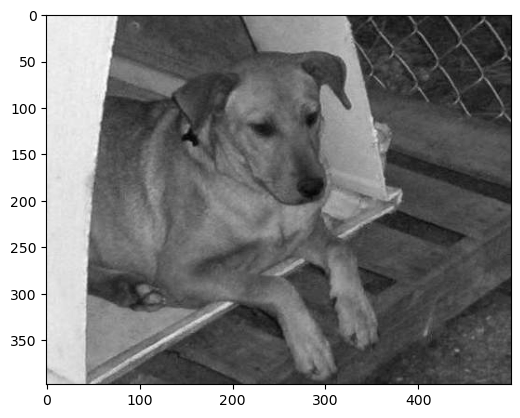

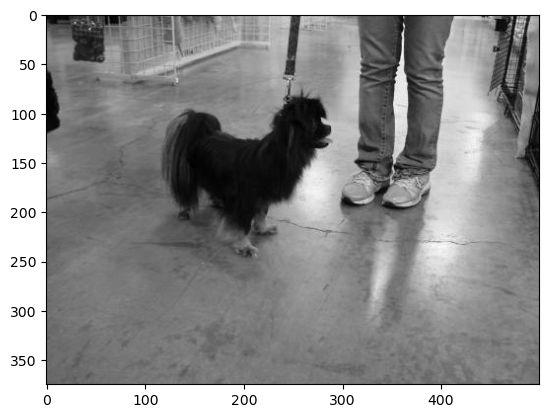

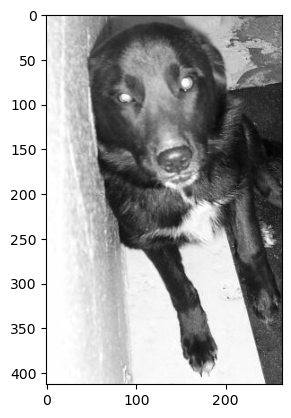

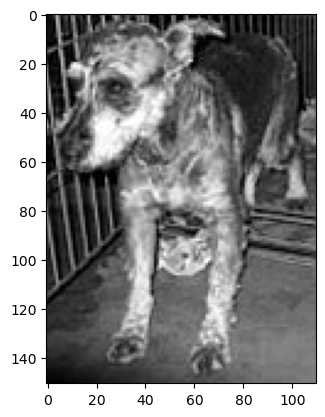

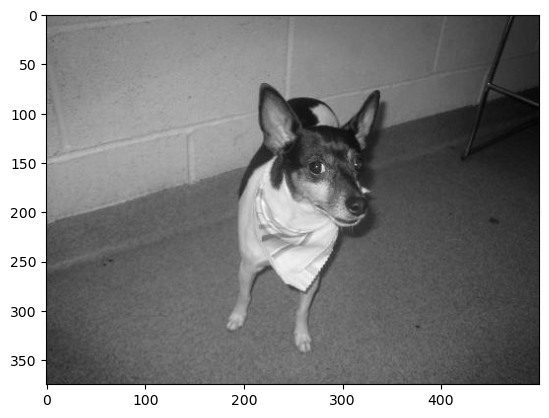

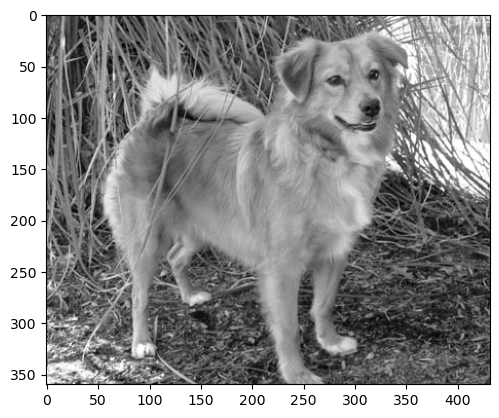

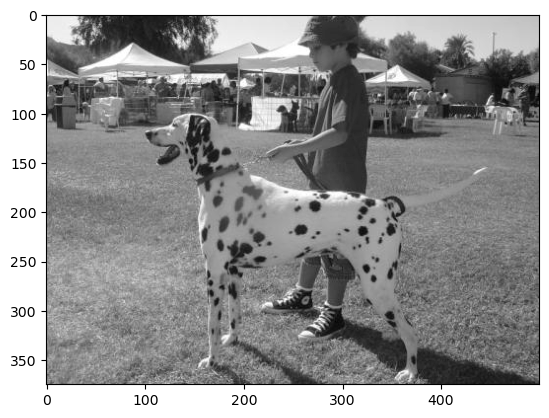

In [2]:
data="PetImages"
categories=["Cat","Dog"]

for category in categories:
    path=os.path.join(data,category)
    x=0
    for image in os.listdir(path):
        x+=1
        img_array=cv2.imread(os.path.join(path,image),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        if x==10:
            break
        

In [3]:
print(img_array)
print(img_array.shape)

[[236 236 236 ... 192 192 192]
 [236 236 236 ... 192 192 192]
 [236 236 236 ... 192 192 192]
 ...
 [136 150 143 ...  86  84  76]
 [123 134 139 ...  85  80  66]
 [177 152 146 ...  55  57  55]]
(375, 500)


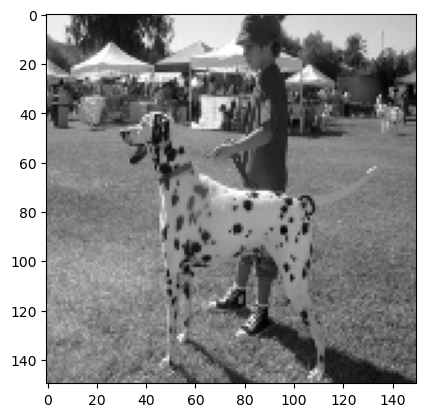

In [4]:
new_array=cv2.resize(img_array,(150,150))
plt.imshow(new_array,cmap='gray')
plt.show()

In [5]:
training_data=[]
def create_training_data():
    for category in categories:
        path=os.path.join(data,category)
        class_num=categories.index(category)
        for image in tqdm(os.listdir(path)):
            try:
                img_array=cv2.imread(os.path.join(path,image),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(150,150))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
            
            
create_training_data()       

100%|██████████| 12501/12501 [05:47<00:00, 36.00it/s]


In [6]:
print(training_data[:5])

[[array([[111, 113, 118, ...,  86,  89,  60],
       [111, 113, 118, ...,  86,  90,  58],
       [109, 113, 117, ...,  89, 105,  40],
       ...,
       [ 79,  61,  57, ...,  77,  79,  81],
       [ 65,  58,  56, ...,  99,  94,  87],
       [ 56,  54,  53, ...,  92,  79,  79]], dtype=uint8), 0], [array([[ 8,  8,  8, ...,  8,  8,  8],
       [ 8,  8,  8, ...,  8,  8,  8],
       [ 8,  8,  8, ...,  8,  8,  8],
       ...,
       [29, 39, 44, ..., 14, 14, 15],
       [31, 44, 32, ..., 11, 12, 13],
       [56, 34, 35, ..., 10, 11, 11]], dtype=uint8), 0], [array([[122, 117, 118, ..., 178, 182, 177],
       [117, 115, 108, ..., 178, 176, 178],
       [115, 118, 113, ..., 179, 179, 176],
       ...,
       [ 18,  17,  19, ..., 162, 159, 161],
       [ 19,  21,  20, ..., 164, 161, 163],
       [ 18,  21,  22, ..., 169, 161, 161]], dtype=uint8), 0], [array([[60, 60, 63, ..., 67, 68, 67],
       [62, 61, 63, ..., 67, 68, 68],
       [58, 60, 63, ..., 68, 68, 69],
       ...,
       [53, 54, 53, 

In [7]:
import random 
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

0
1
1
1
0
1
1
0
0
0


In [ ]:
x=[]
y=[]
for features,labeles in training_data:
    x.append(features)
    y.append(labeles)
x=np.array(x).reshape(-1,150,150)
y=np.array(y)

In [ ]:
import pickle
pickle_out=open('x.pickle','wb')
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out=open('y.pickle','wb')
pickle.dump(y,pickle_out)
pickle_out.close()


pickle_in=open('x.pickle','rb')
x=pickle.load(pickle_in)

pickle_in=open('y.pickle','rb')
y=pickle.load(pickle_in)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(150,150)),
    keras.layers.Dense(512,activation=tf.nn.relu),
    keras.layers.Dense(256,activation=tf.nn.relu),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(64,activation=tf.nn.relu),
    keras.layers.Dense(64,activation=tf.nn.relu),
    keras.layers.Dense(32,activation=tf.nn.relu),
    keras.layers.Dense(2,activation=tf.nn.softmax)
    
    
    
    
])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=3)

In [ ]:
test_loss,test_acc=model.evaluate(x_test, y_test)
print(test_loss)
print(test_acc)

In [ ]:
output=model.predict(x_test)
y_pred=np.argmax(output,axis=1)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_pred,y_test))

In [ ]:
print(confusion_matrix(y_pred,y_test))

In [ ]:
model.save("model.h5")